# Shipping Containers

* **Data:** `Stats - TEU By Year.csv`
* **Description:** Shipping container statistics, by year, from the Port of Long Beach (California).
* **Source:** https://polb.com/business/port-statistics/#yearly-teus
* **Columns of interest:**
    * `Year` is the year of the data
    * **Loaded** columns involve shipping containers that are full
    * **Empty** columns involve shipping containers are are empty
    * **Inbound** columns involve shipping containers coming into the port
    * **Outbound** columns involve shipping containers leaving the port
    * `Total Throughput` is the number of shipping containers going in and out of the port

## Read in your data

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
df = pd.read_csv("Stats - TEU By Year.csv")
pd.set_option("display.float_format", '{:,}' .format)
df.head()

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput
0,2020,"3,998,340","1,475,888","5,474,227","146,370","2,492,718","2,639,088","8,113,315"
1,2019,"3,758,438","1,472,802","5,231,240","74,706","2,326,087","2,400,792","7,632,032"
2,2018,"4,097,377","1,523,008","5,620,386","91,364","2,379,274","2,470,638","8,091,023"
3,2017,"3,863,187","1,470,514","5,333,701","75,710","2,135,096","2,210,806","7,544,507"
4,2016,"3,442,575","1,529,497","4,972,073","99,349","1,703,750","1,803,098","6,775,171"


## How many years of data do we have?

Also provide the first and last year

In [2]:
df.columns= df.columns.str.lower().str.replace(" ", "_")
df.head()

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput
0,2020,"3,998,340","1,475,888","5,474,227","146,370","2,492,718","2,639,088","8,113,315"
1,2019,"3,758,438","1,472,802","5,231,240","74,706","2,326,087","2,400,792","7,632,032"
2,2018,"4,097,377","1,523,008","5,620,386","91,364","2,379,274","2,470,638","8,091,023"
3,2017,"3,863,187","1,470,514","5,333,701","75,710","2,135,096","2,210,806","7,544,507"
4,2016,"3,442,575","1,529,497","4,972,073","99,349","1,703,750","1,803,098","6,775,171"


In [3]:
df.dtypes

year                 int64
loaded_inbound      object
loaded_outbound     object
total_loaded        object
empties_inbound     object
empties_outbound    object
total_empties       object
total_throughput    object
dtype: object

In [4]:
df.year.count()

25

## What is the total number of shipping containers that went in and out of the port during this time period?

In [5]:
df.total_throughput = df.total_throughput.str.replace(",", "").astype(float)
df.loaded_outbound = df.loaded_outbound.str.replace(",", "").astype(float)
df.empties_outbound = df.empties_outbound.str.replace(",", "").astype(float)
df.loaded_inbound = df.loaded_inbound.str.replace(",", "").astype(float)
df.total_loaded = df.total_loaded.str.replace(",", "").astype(float)
df.total_empties = df.total_empties.str.replace(",", "").astype(float)
df.empties_inbound = df.empties_inbound.str.replace(",", "").astype(float)
df

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0"
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0"
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0"
3,2017,"3,863,187.0","1,470,514.0","5,333,701.0","75,710.0","2,135,096.0","2,210,806.0","7,544,507.0"
4,2016,"3,442,575.0","1,529,497.0","4,972,073.0","99,349.0","1,703,750.0","1,803,098.0","6,775,171.0"
5,2015,"3,625,264.0","1,525,561.0","5,150,825.0","101,560.0","1,939,684.0","2,041,244.0","7,192,069.0"
6,2014,"3,517,512.0","1,604,395.0","5,121,907.0","89,184.0","1,609,716.0","1,698,900.0","6,820,807.0"
7,2013,"3,455,331.0","1,704,924.0","5,160,255.0","71,760.0","1,498,558.0","1,570,318.0","6,730,573.0"
8,2012,"3,062,301.0","1,540,179.0","4,602,479.0","82,605.0","1,360,579.0","1,443,183.0","6,045,663.0"
9,2011,"3,024,964.0","1,506,702.0","4,531,666.0","107,441.0","1,421,995.0","1,529,436.0","6,061,102.0"


In [6]:
df.dtypes

year                  int64
loaded_inbound      float64
loaded_outbound     float64
total_loaded        float64
empties_inbound     float64
empties_outbound    float64
total_empties       float64
total_throughput    float64
dtype: object

In [7]:
df.total_throughput.sum()

149025835.0

## Create a new column called `total_outbound` that is total containers leaving the port

In [8]:
df["total_outbound"] = df.loaded_outbound + df.empties_outbound
df.head()

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_outbound
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","3,968,606.0"
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0","3,798,889.0"
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0","3,902,282.0"
3,2017,"3,863,187.0","1,470,514.0","5,333,701.0","75,710.0","2,135,096.0","2,210,806.0","7,544,507.0","3,605,610.0"
4,2016,"3,442,575.0","1,529,497.0","4,972,073.0","99,349.0","1,703,750.0","1,803,098.0","6,775,171.0","3,233,247.0"


## Create a new column that is percent empty for containers leaving the port

In [9]:
df["percent_empty"] = df.empties_outbound / df.total_outbound *100
df.head()

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_outbound,percent_empty
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","3,968,606.0",62.81092151753034
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0","3,798,889.0",61.230717717732745
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0","3,902,282.0",60.97134958467891
3,2017,"3,863,187.0","1,470,514.0","5,333,701.0","75,710.0","2,135,096.0","2,210,806.0","7,544,507.0","3,605,610.0",59.215944042755595
4,2016,"3,442,575.0","1,529,497.0","4,972,073.0","99,349.0","1,703,750.0","1,803,098.0","6,775,171.0","3,233,247.0",52.694705972046066


## What year had the highest percentage of empty containers leaving the port?

In [10]:
df.sort_values("percent_empty", ascending=False).head(1)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_outbound,percent_empty
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","3,968,606.0",62.81092151753034


## Plot the percent of empty containers leaving the port over the years

In [11]:
df.year = pd.to_datetime(df.year, format="%Y", errors="coerce")
df.head()

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_outbound,percent_empty
0,2020-01-01,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","3,968,606.0",62.81092151753034
1,2019-01-01,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0","3,798,889.0",61.230717717732745
2,2018-01-01,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0","3,902,282.0",60.97134958467891
3,2017-01-01,"3,863,187.0","1,470,514.0","5,333,701.0","75,710.0","2,135,096.0","2,210,806.0","7,544,507.0","3,605,610.0",59.215944042755595
4,2016-01-01,"3,442,575.0","1,529,497.0","4,972,073.0","99,349.0","1,703,750.0","1,803,098.0","6,775,171.0","3,233,247.0",52.694705972046066


<AxesSubplot:xlabel='year'>

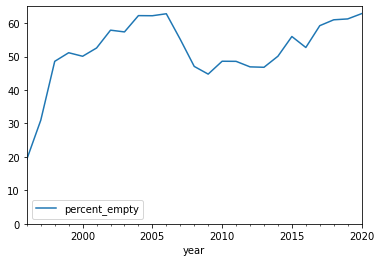

In [12]:
df.plot(x="year", y="percent_empty", ylim=(0))

## Plot the port's total shipping container throughput over time

<AxesSubplot:title={'center':'Total throughput rises'}, xlabel='year'>

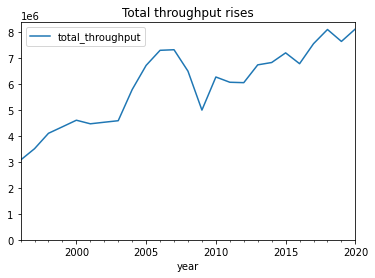

In [13]:
df.plot(x="year", y="total_throughput", ylim=(0), title="Total throughput rises")

## What year had the largest percent drop in throughput?

You calculate percentage change on a column using using `.pct_change()`.

In [17]:
df.resample('A', on='year').total_throughput.sum().pct_change().round(2).sort_values()
#2009, around 23%, during the aftermath of the global financial crisis.

year
2009-12-31   -0.23
2008-12-31   -0.11
2016-12-31   -0.06
2019-12-31   -0.06
2001-12-31   -0.03
2011-12-31   -0.03
2012-12-31    -0.0
2007-12-31     0.0
2014-12-31    0.01
2002-12-31    0.01
2003-12-31    0.01
2015-12-31    0.05
2020-12-31    0.06
2000-12-31    0.06
1999-12-31    0.06
2018-12-31    0.07
2006-12-31    0.09
2013-12-31    0.11
2017-12-31    0.11
1997-12-31    0.14
2005-12-31    0.16
1998-12-31    0.17
2010-12-31    0.26
2004-12-31    0.26
1996-12-31     NaN
Name: total_throughput, dtype: float64

## Complete the following sentence, using the year from the last question

`Compared to the previous year, in____ there was a ____% drop in shipping container throughput.` Just type it in a comment, no need to use f-strings or anything. 

In [16]:
#Compared to the previous year, in 2009, there was a 23% drop in shipping container throughput.